#  Python: Image processing 

### Summary 


I. <a href="#Part-I:-Display-pictures">Part I: Display pictures </a>
1. <a href="#1.-Read-and-show-the-test-pictures">Read and show the test pictures </a>
2. <a href="#2.-Show-the-size-of-pictures">Show the size of pictures </a>

II. <a href="#Part-II:-First-steps">Part II: First steps </a>

1. <a href="#1-Smoothing-the-images-to-grayscale.">Smoothing the images to grayscale  </a>
2. <a href="#2.-filtering-images-using-bilateral-filters-">Filtering images using bilateral filters   </a>
3. <a href="#3.-Create-a-mask-edge-">Create a mask edge  </a>
4. <a href="#4.-Cartoon-effect-">Cartoon effect   </a>

III. <a href="#Part-III:-Advanced-processing">Part III: Advanced processing </a>

1. <a href="#1.-Equalize-hist">Equalize hist </a>
2. <a href="#2.-Adaptive-threshold-">Adaptive threshold   </a>
3. <a href="#3.-Canny's-Algorithm">Canny's Algorithm   </a>
4. <a href="#4.-Wrap-the-pictures-"> Wrap the pictures   </a>

<a href="#Conclusion">Conclusion </a>

###  Importing libraries 

In [5]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Part I: Display pictures

## 1. Read and show the test pictures  

In [18]:
# Read pictures 
img1 = mpimg.imread('./image1.jpg')
img2 = mpimg.imread('./image2.jpg')
img3 = mpimg.imread('./image3.jpg')
img4 = mpimg.imread('./image4.jpg')

# Display the 4 images in a grid 2x2

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(7,5))
                    
ax1.imshow(img1)
ax1.set_title("Image 1")
ax2.imshow(img2)
ax2.set_title("Image 2")
ax3.imshow(img3)
ax3.set_title("Image 3")
ax4.imshow(img4)
ax4.set_title("Image 4")
                    
# Show the plot
plt.show()

<IPython.core.display.Javascript object>

## 2. Show the size of pictures


In [33]:
# Path of images
images=['./image1.jpg','./image2.jpg','./image3.jpg','./image4.jpg']

# function that prints images as an array
def toArray(image_list):
    i=1
    for element in image_list:
        im = Image.open(element)
        im_matrix = np.array(im)
        print("image "+str(i)+": "+ str(im_matrix))
        i+=1
        
#function that prints the shape of the arrays bellow        
def shape(image_list):
    i=1
    for element in image_list:
        im = Image.open(element)
        im_matrix = np.array(im).shape
        print("image "+str(i)+": "+ str(im_matrix))
        i+=1    
        
#toArray(images)
shape(images)


image 1: (2048, 2048, 3)
image 2: (667, 1000, 3)
image 3: (487, 730, 3)
image 4: (168, 300, 3)


# Part II: First steps 

## 1. Smoothing the images to grayscale 

<IPython.core.display.Javascript object>


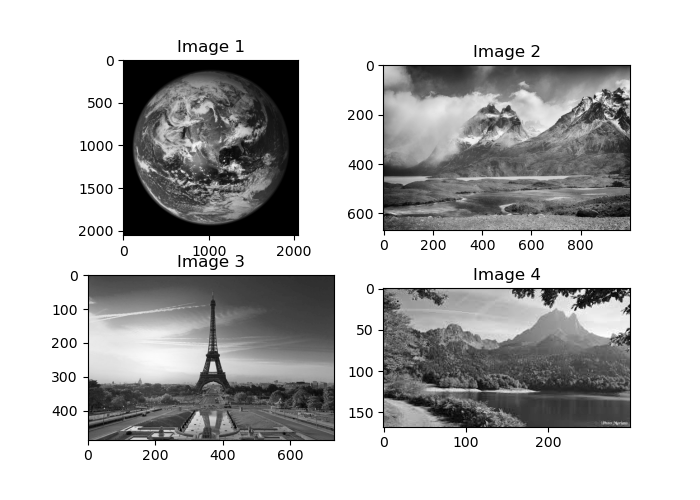

In [59]:

# function to smooth the images to grayscale

def to_gray(image_list):
       L=[]  
       for element in image_list:    
           im = cv2.imread(element)
           imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
           L.append(imgray)
       return L

#Smooth each image to grayscale 
imgray_list=to_gray(images)

#add images to grid and show the plot
fig2, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(7,5))
ax1.imshow(imgray_list[0],cmap="gray")
ax1.set_title("Image 1")
ax2.imshow(imgray_list[1],cmap="gray")
ax2.set_title("Image 2")
ax3.imshow(imgray_list[2],cmap="gray")
ax3.set_title("Image 3")
ax4.imshow(imgray_list[3],cmap="gray")
ax4.set_title("Image 4")
                    
# Show the plot
plt.show()

<IPython.core.display.Javascript object>


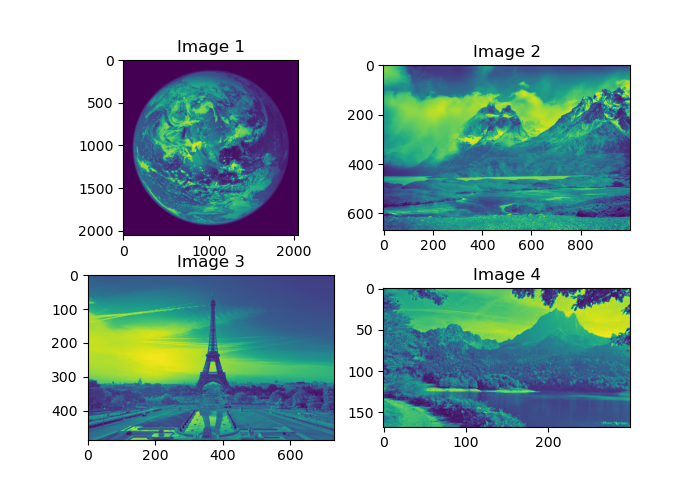

In [40]:
imgray_list=to_gray(images)

#add images to grid and show the plot
fig2, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(7,5))
ax1.imshow(imgray_list[0])
ax1.set_title("Image 1")
ax2.imshow(imgray_list[1])
ax2.set_title("Image 2")
ax3.imshow(imgray_list[2])
ax3.set_title("Image 3")
ax4.imshow(imgray_list[3])
ax4.set_title("Image 4")
                    
# Show the plot
plt.show()

## 2. filtering images using bilateral filters  

interactive(children=(IntSlider(value=20, description='d', max=60, min=-20), Output()), _dom_classes=('widget-…

<IPython.core.display.Javascript object>


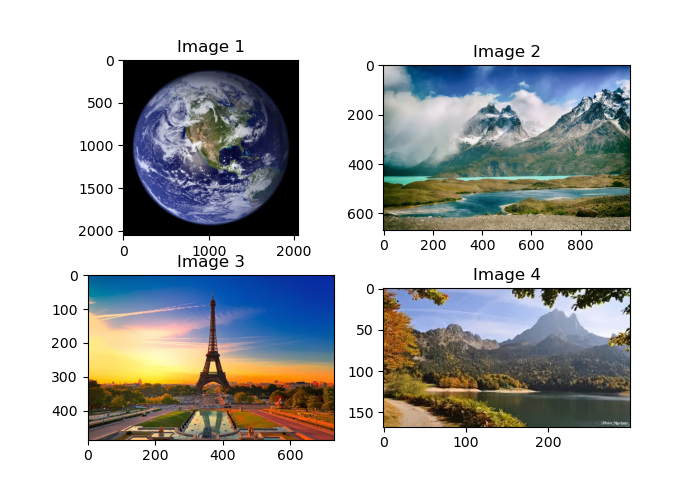

In [85]:
#Use of the bilateral filter to reduce noise:
from ipywidgets import interact, interactive, fixed, interact_manual
def to_RGB(im):
    return cv2.cvtColor(im, cv2.COLOR_BGR2RGB)


# function to filter each picture in the list

def filter(image_list):
       @interact
       def diametre(d=20):
           return d
       L=[]  
       for element in image_list:    
           im = cv2.imread(element)
           color_image = cv2.bilateralFilter(im, d=diametre(20), sigmaColor=10,sigmaSpace=10)      
           #d is the diameter of the pixels.
           #SignmaColor and sigmaSpace are used to give the image a blurred appearance by removing the roughness of the colors.
           imrgb = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)
           L.append(imrgb)
       return L


#filter images 

imrgb_list=filter(images)   

#add images to grid and show the plot
fig3, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(7,5))
ax1.imshow(imrgb_list[0],cmap="gray")
ax1.set_title("Image 1")
ax2.imshow(imrgb_list[1],cmap="gray")
ax2.set_title("Image 2")
ax3.imshow(imrgb_list[2],cmap="gray")
ax3.set_title("Image 3")
ax4.imshow(imrgb_list[3],cmap="gray")
ax4.set_title("Image 4")
                    
# Show the plot
plt.show()

## 3. Create a mask edge 

##### We will detect the edges in the image and highlight them using the function cv2.adaptiveThreshold().''Adaptive thresholding technique'

In [ ]:
def edge_mask(imgGray, line_size, blur_value):
    gray = cv2.cvtColor(imgGray, cv2.COLOR_BGR2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)
    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
    return edges

##### Choice of filtering parameters and filter images

<IPython.core.display.Javascript object>


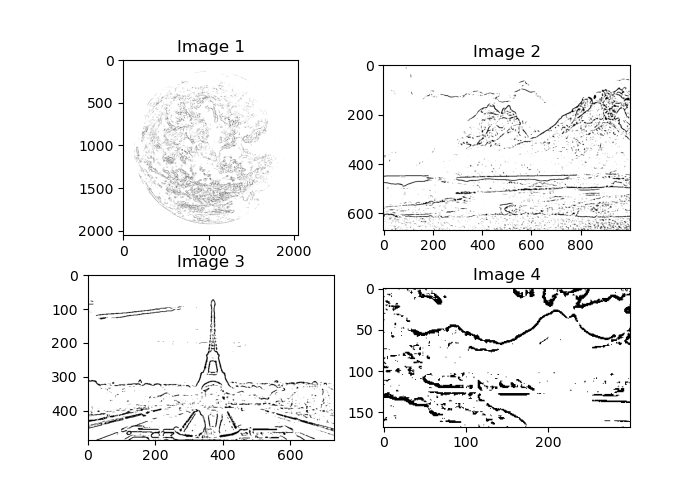

In [54]:
# function to filter each picture in the list

def edge_mark_filter(image_list):
       def edge_mask(imgGray, line_size, blur_value):
             gray = cv2.cvtColor(imgGray, cv2.COLOR_BGR2GRAY)
             gray_blur = cv2.medianBlur(gray, blur_value)
             edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
             return edges
       L=[]  
       for element in image_list:    
           im = cv2.imread(element)
           edges = edge_mask(im, 7, 7)
           L.append(edges)
       return L

#filter images 
imrgb_list=edge_mark_filter(images)

#add images to grid and show the plot
fig3, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(7,5))
ax1.imshow(imrgb_list[0],cmap="gray")
ax1.set_title("Image 1")
ax2.imshow(imrgb_list[1],cmap="gray")
ax2.set_title("Image 2")
ax3.imshow(imrgb_list[2],cmap="gray")
ax3.set_title("Image 3")
ax4.imshow(imrgb_list[3],cmap="gray")
ax4.set_title("Image 4")
                    
# Show the plot
plt.show()

<IPython.core.display.Javascript object>


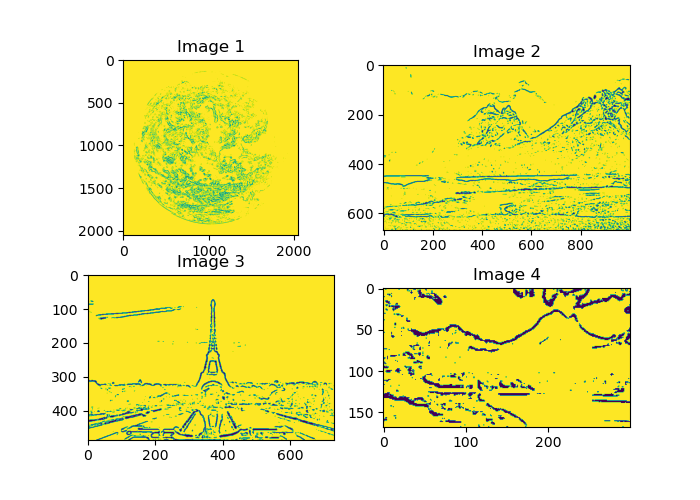

In [91]:
#add images to grid and show the plot
imrgb_list=edge_mark_filter(images)
fig3, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(7,5))
ax1.imshow(imrgb_list[0])
ax1.set_title("Image 1")
ax2.imshow(imrgb_list[1])
ax2.set_title("Image 2")
ax3.imshow(imrgb_list[2])
ax3.set_title("Image 3")
ax4.imshow(imrgb_list[3])
ax4.set_title("Image 4")
                    
# Show the plot
plt.show()

## 4. Cartoon effect 

<IPython.core.display.Javascript object>


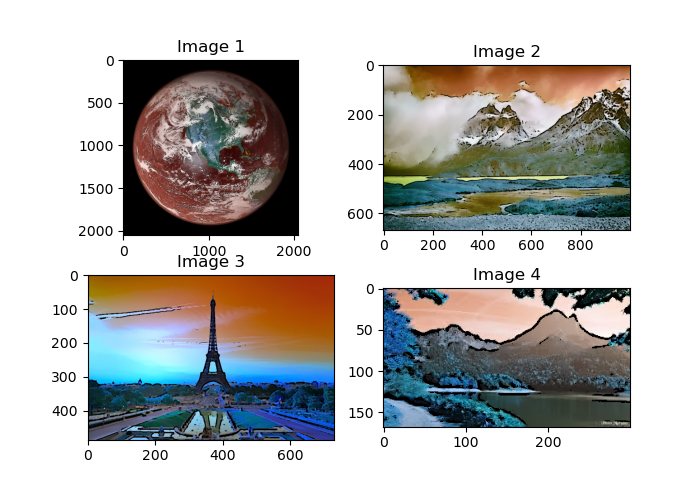

In [68]:
# function to filter each picture in the list

def cartoon_effect(image_list):
       def edge_mask(imgGray, line_size, blur_value):
            gray = cv2.cvtColor(imgGray, cv2.COLOR_BGR2GRAY)
            gray_blur = cv2.medianBlur(gray, blur_value)
            edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
            return edges
       L=[]  
       for element in image_list:    
           im = cv2.imread(element)
           color_image = cv2.bilateralFilter(im, d=30, sigmaColor=10,sigmaSpace=10)
           edges = edge_mask(im, 7, 7)
           cartoon = cv2.bitwise_and(color_image, color_image, mask=edges)
           L.append(cartoon)
       return L


#filter images 
cartoon_list=cartoon_effect(images)

#add images to grid and show the plot
fig3, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(7,5))
ax1.imshow(cartoon_list[0])
ax1.set_title("Image 1")
ax2.imshow(cartoon_list[1])
ax2.set_title("Image 2")
ax3.imshow(cartoon_list[2])
ax3.set_title("Image 3")
ax4.imshow(cartoon_list[3])
ax4.set_title("Image 4")
                    
# Show the plot
plt.show()

## Part III: Advanced processing 


## 1. Equalize hist

In [87]:

# function to equalize the hist for each picture in the list

def equalize_hist(image_list):
       L=[]  
       for element in image_list:    
           im = cv2.imread(element)
           im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
           im= cv2.equalizeHist(im)
           L.append(im)
       return L


#filter images 
list=equalize_hist(images)

#add images to grid and show the plot
fig3, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(7,5))
ax1.imshow(list[0],cmap="gray")
ax1.set_title("Image 1")
ax2.imshow(list[1],cmap="gray")
ax2.set_title("Image 2")
ax3.imshow(list[2],cmap="gray")
ax3.set_title("Image 3")
ax4.imshow(list[3],cmap="gray")
ax4.set_title("Image 4")
                    
# Show the plot
plt.show()


<IPython.core.display.Javascript object>

## 2. Adaptive threshold

<IPython.core.display.Javascript object>


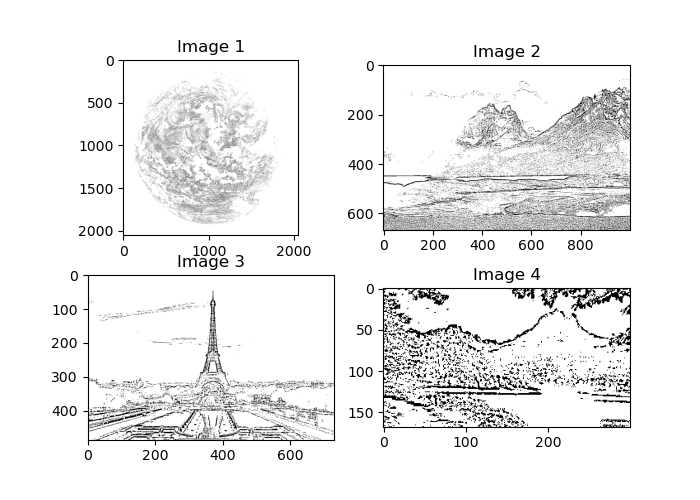

In [88]:

# function to equalize the hist for each picture in the list

def adaptive_threshold(image_list):
       L=[]  
       for element in image_list:    
           im = cv2.imread(element)
           im = cv2.split(im)[0]
           im= cv2.adaptiveThreshold(im, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 15)
           L.append(im)
       return L


#filter images 
list=adaptive_threshold(images)

#add images to grid and show the plot
fig3, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(7,5))
ax1.imshow(list[0],cmap="gray")
ax1.set_title("Image 1")
ax2.imshow(list[1],cmap="gray")
ax2.set_title("Image 2")
ax3.imshow(list[2],cmap="gray")
ax3.set_title("Image 3")
ax4.imshow(list[3],cmap="gray")
ax4.set_title("Image 4")
                    
# Show the plot
plt.show()

## 3. Canny's Algorithm

<IPython.core.display.Javascript object>


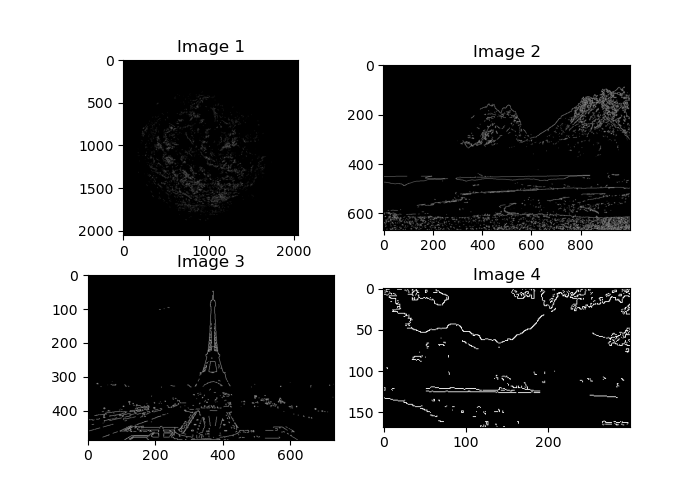

In [92]:
# function to filter each picture using canny's algorithm

def canny_algorithm(image_list):
       L=[]  
       for element in image_list:    
           im = cv2.imread(element)
           Img_bin = cv2.split(im)[0]
           Img_bin = cv2.Canny(Img_bin, 300, 400)
           Img_bin = to_RGB(Img_bin)
           L.append(Img_bin)
       return L


#filter images with canny's algorithm
list=canny_algorithm(images)

#add images to grid and show the plot
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(7,5))
ax1.imshow(list[0])
ax1.set_title("Image 1")
ax2.imshow(list[1])
ax2.set_title("Image 2")
ax3.imshow(list[2])
ax3.set_title("Image 3")
ax4.imshow(list[3])
ax4.set_title("Image 4")
                    
# Show the plot
plt.show()

## 4. Wrap the pictures

<IPython.core.display.Javascript object>


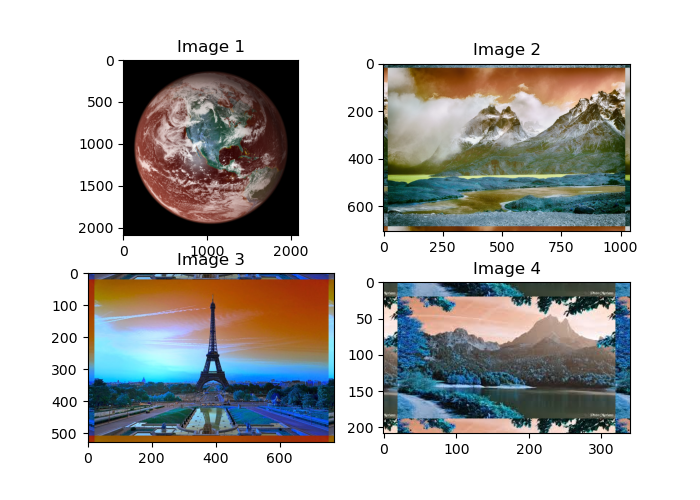

In [95]:
# function to equalize the hist for each picture in the list

def wrap(image_list):
       L=[]  
       for element in image_list:    
           im = cv2.imread(element)
           Img_wra = cv2.copyMakeBorder(im, 20, 20, 20, 20, cv2.BORDER_WRAP)
           L.append(Img_wra)
       return L


#filter images with canny's algorithm
list=wrap(images)

#add images to grid and show the plot
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(7,5))
ax1.imshow(list[0])
ax1.set_title("Image 1")
ax2.imshow(list[1])
ax2.set_title("Image 2")
ax3.imshow(list[2])
ax3.set_title("Image 3")
ax4.imshow(list[3])
ax4.set_title("Image 4")
                    
# Show the plot
plt.show()


# Conclusion

#### We used some python function to have cartoon pictures and scalegray pictures

In [113]:
#list of resulting pictures
images=["./step1.png","./step2.png","./step3.png","./step4.png","./step5.png","./step6.png"]

# function to read png files (images)
def read_png(image_list):
       L=[]  
       for element in image_list:    
           element = plt.imread(element)
           L.append(element)
       return L
images1 = read_png(images)
# add pictures to grid and show the plot
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2,ncols=3,figsize=(7,5))
ax1.imshow(images1[0])
ax1.set_title("Original piture")
ax2.imshow(images1[1])
ax2.set_title("Scalegray filter")
ax3.imshow(images1[2])
ax3.set_title("RGB filter")
ax4.imshow(images1[3])
ax4.set_title("colors filter")
ax5.imshow(images1[4])
ax5.set_title("Mark edge filter")
ax6.imshow(images1[5])
ax6.set_title("Cartoon effect")

plt.show()

<IPython.core.display.Javascript object>

##### With also algorithms to do picture processing such: canny's algorithm and adaptive threshold

<IPython.core.display.Javascript object>


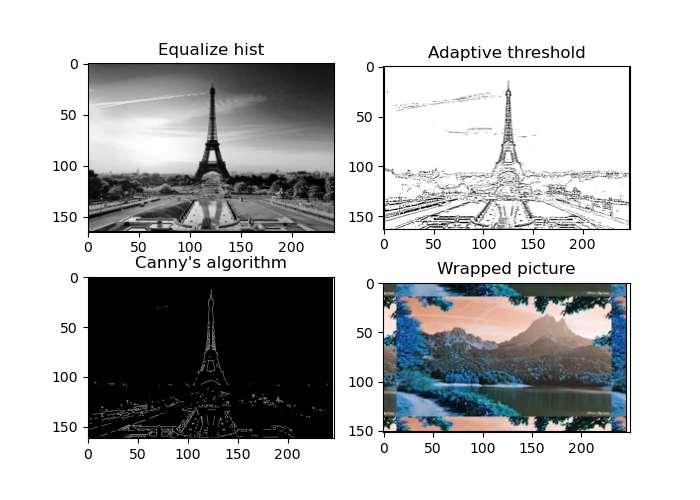

In [112]:
# read  png files
images2=["./step7.png","./step8.png","./step9.png","./step10.png"]
images2 = read_png(images2)

# add pictures to grid and show the plot
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(7,5))
ax1.imshow(images2[0])
ax1.set_title("Equalize hist")
ax2.imshow(images2[1])
ax2.set_title("Adaptive threshold")
ax3.imshow(images2[2])
ax3.set_title("Canny's algorithm")
ax4.imshow(images2[3])
ax4.set_title("Wrapped picture")
plt.show()
